In [1]:
!git clone https://github.com/PoojaPremnath2003/ImageSuperResolution_Urban100


fatal: destination path 'ImageSuperResolution_Urban100' already exists and is not an empty directory.


In [2]:
path_high="/content/ImageSuperResolution_Urban100/High Resolution"
path_low="/content/ImageSuperResolution_Urban100/Low Resolution"

In [3]:
import os
import re
import torch
from torch.utils.data import Dataset
from skimage import io, transform

In [4]:
class CustomDataset(Dataset):
    def __init__(self, path_low, path_high, file_list):
        self.lr_path = path_low
        self.hr_path = path_high
        self.file_list = file_list
        self.target_size = (256, 256)  # Adjust this size as needed


    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        img_name_lr = os.path.join(self.lr_path, self.file_list[idx])
        img_name_hr = os.path.join(self.hr_path, re.sub(r'LR', 'HR', self.file_list[idx]))

        # Load LR and HR images
        image_lr = io.imread(img_name_lr, as_gray=True)
        image_hr = io.imread(img_name_hr, as_gray=True)

        # Resize images to a common size
        image_lr = transform.resize(image_lr, self.target_size, mode='constant', anti_aliasing=True)
        image_hr = transform.resize(image_hr, self.target_size, mode='constant', anti_aliasing=True)

        # Convert to PyTorch tensors
        image_lr = torch.from_numpy(image_lr).unsqueeze(0).float()
        image_hr = torch.from_numpy(image_hr).unsqueeze(0).float()

        return image_lr, image_hr


In [5]:
from sklearn.model_selection import train_test_split
file_list = [f for f in os.listdir(path_low) if f.endswith("LR.png")]

# Perform train-test split
train_files, test_files = train_test_split(file_list, test_size=0.2, random_state=42)

# Create datasets and data loaders for train and test sets
train_dataset = CustomDataset(path_low, path_high, train_files)
test_dataset = CustomDataset(path_low, path_high, test_files)

In [ ]:
print(file_list)

['img_007_SRF_4_LR.png', 'img_045_SRF_2_LR.png', 'img_090_SRF_4_LR.png', 'img_039_SRF_2_LR.png', 'img_059_SRF_2_LR.png', 'img_060_SRF_2_LR.png', 'img_077_SRF_4_LR.png', 'img_031_SRF_4_LR.png', 'img_092_SRF_4_LR.png', 'img_039_SRF_4_LR.png', 'img_088_SRF_4_LR.png', 'img_002_SRF_4_LR.png', 'img_085_SRF_4_LR.png', 'img_058_SRF_4_LR.png', 'img_027_SRF_2_LR.png', 'img_013_SRF_2_LR.png', 'img_083_SRF_2_LR.png', 'img_066_SRF_4_LR.png', 'img_033_SRF_2_LR.png', 'img_048_SRF_2_LR.png', 'img_100_SRF_2_LR.png', 'img_084_SRF_2_LR.png', 'img_040_SRF_2_LR.png', 'img_007_SRF_2_LR.png', 'img_016_SRF_2_LR.png', 'img_047_SRF_4_LR.png', 'img_034_SRF_4_LR.png', 'img_068_SRF_4_LR.png', 'img_004_SRF_2_LR.png', 'img_056_SRF_4_LR.png', 'img_095_SRF_2_LR.png', 'img_070_SRF_2_LR.png', 'img_069_SRF_2_LR.png', 'img_065_SRF_2_LR.png', 'img_064_SRF_2_LR.png', 'img_041_SRF_2_LR.png', 'img_023_SRF_4_LR.png', 'img_078_SRF_4_LR.png', 'img_005_SRF_4_LR.png', 'img_010_SRF_4_LR.png', 'img_086_SRF_2_LR.png', 'img_062_SRF_2_

In [ ]:
print(train_dataset.file_list)

['img_019_SRF_4_LR.png', 'img_081_SRF_4_LR.png', 'img_005_SRF_4_LR.png', 'img_016_SRF_2_LR.png', 'img_020_SRF_2_LR.png', 'img_075_SRF_2_LR.png', 'img_056_SRF_4_LR.png', 'img_048_SRF_2_LR.png', 'img_054_SRF_4_LR.png', 'img_096_SRF_4_LR.png', 'img_018_SRF_2_LR.png', 'img_021_SRF_4_LR.png', 'img_060_SRF_2_LR.png', 'img_073_SRF_4_LR.png', 'img_006_SRF_2_LR.png', 'img_089_SRF_4_LR.png', 'img_082_SRF_2_LR.png', 'img_009_SRF_2_LR.png', 'img_066_SRF_2_LR.png', 'img_052_SRF_4_LR.png', 'img_028_SRF_2_LR.png', 'img_057_SRF_2_LR.png', 'img_070_SRF_2_LR.png', 'img_085_SRF_4_LR.png', 'img_041_SRF_2_LR.png', 'img_008_SRF_2_LR.png', 'img_015_SRF_2_LR.png', 'img_065_SRF_4_LR.png', 'img_011_SRF_2_LR.png', 'img_011_SRF_4_LR.png', 'img_097_SRF_2_LR.png', 'img_012_SRF_2_LR.png', 'img_098_SRF_4_LR.png', 'img_062_SRF_2_LR.png', 'img_044_SRF_2_LR.png', 'img_004_SRF_4_LR.png', 'img_034_SRF_4_LR.png', 'img_043_SRF_2_LR.png', 'img_030_SRF_2_LR.png', 'img_080_SRF_2_LR.png', 'img_090_SRF_4_LR.png', 'img_077_SRF_2_

In [6]:
from torch.utils.data import DataLoader
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)


In [17]:
import torch
import torch.nn as nn
from torchsummary import summary

class EDSR(nn.Module):
    def __init__(self, scale_factor=4, num_channels=1, num_features=64, num_blocks=8):
        super(EDSR, self).__init__()

        # Head
        self.head = nn.Conv2d(num_channels, num_features, kernel_size=3, stride=1, padding=1)

        # Residual blocks
        self.res_blocks = nn.ModuleList([
            ResidualBlock(num_features) for _ in range(num_blocks)
        ])

        # Tail
        self.tail = nn.Conv2d(num_features, num_channels, kernel_size=3, stride=1, padding=1)

    def forward(self, x):
        # Head
        x = self.head(x)
        residual = x

        # Residual blocks
        for block in self.res_blocks:
            x = block(x)

        # Additional convolution in the tail to adjust channels
        residual = nn.Conv2d(residual.shape[1], x.shape[1], kernel_size=1)(residual)
        x += residual

        return x

# Print the model summary
input_height, input_width = 256, 256
model = EDSR()
summary(model, (1, input_height, input_width))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 256, 256]             640
            Conv2d-2         [-1, 64, 256, 256]          36,928
              ReLU-3         [-1, 64, 256, 256]               0
            Conv2d-4         [-1, 64, 256, 256]          36,928
     ResidualBlock-5         [-1, 64, 256, 256]               0
            Conv2d-6         [-1, 64, 256, 256]          36,928
              ReLU-7         [-1, 64, 256, 256]               0
            Conv2d-8         [-1, 64, 256, 256]          36,928
     ResidualBlock-9         [-1, 64, 256, 256]               0
           Conv2d-10         [-1, 64, 256, 256]          36,928
             ReLU-11         [-1, 64, 256, 256]               0
           Conv2d-12         [-1, 64, 256, 256]          36,928
    ResidualBlock-13         [-1, 64, 256, 256]               0
           Conv2d-14         [-1, 64, 2

In [21]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.optim import SGD
from tqdm import tqdm


model = EDSR()

# Define loss and optimizer
criterion = nn.MSELoss()
optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)

# Training loop
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    # Iterate over the dataset
    for inputs, targets in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        # Convert RGB targets to grayscale
        targets_gray = torch.mean(targets, dim=1, keepdim=True)

        # Forward pass
        outputs = model(inputs)

        # Compute the loss
        loss = criterion(outputs, targets_gray)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Print average loss for the epoch
    average_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {average_loss:.4f}")

print("Training complete!")


Epoch 1/10: 100%|██████████| 20/20 [17:42<00:00, 53.14s/it]


Epoch 1/10, Loss: 0.1856


Epoch 2/10: 100%|██████████| 20/20 [17:44<00:00, 53.23s/it]


Epoch 2/10, Loss: 0.0755


Epoch 3/10: 100%|██████████| 20/20 [17:46<00:00, 53.32s/it]


Epoch 3/10, Loss: 0.0576


Epoch 4/10: 100%|██████████| 20/20 [17:12<00:00, 51.61s/it]


Epoch 4/10, Loss: 0.0470


Epoch 5/10: 100%|██████████| 20/20 [17:18<00:00, 51.94s/it]


Epoch 5/10, Loss: 0.0423


Epoch 6/10: 100%|██████████| 20/20 [17:23<00:00, 52.18s/it]


Epoch 6/10, Loss: 0.0406


Epoch 7/10: 100%|██████████| 20/20 [17:14<00:00, 51.70s/it]


Epoch 7/10, Loss: 0.0340


Epoch 8/10: 100%|██████████| 20/20 [17:11<00:00, 51.59s/it]


Epoch 8/10, Loss: 0.0333


Epoch 9/10: 100%|██████████| 20/20 [17:07<00:00, 51.36s/it]


Epoch 9/10, Loss: 0.0288


Epoch 10/10: 100%|██████████| 20/20 [17:09<00:00, 51.49s/it]

Epoch 10/10, Loss: 0.0282
Training complete!


In [23]:
# Testing loop
model.eval()
test_loss = 0.0

with torch.no_grad():
    for inputs_lr, targets_hr in test_loader:
        outputs_hr = model(inputs_lr)
        test_loss += criterion(outputs_hr, targets_hr).item()

average_test_loss = test_loss / len(test_loader)
print(f'Average Test Loss: {average_test_loss}')


Average Test Loss: 0.026861675828695298


In [24]:
# Save the model parameters and weights
torch.save(model.state_dict(), 'edsr_model.pth')



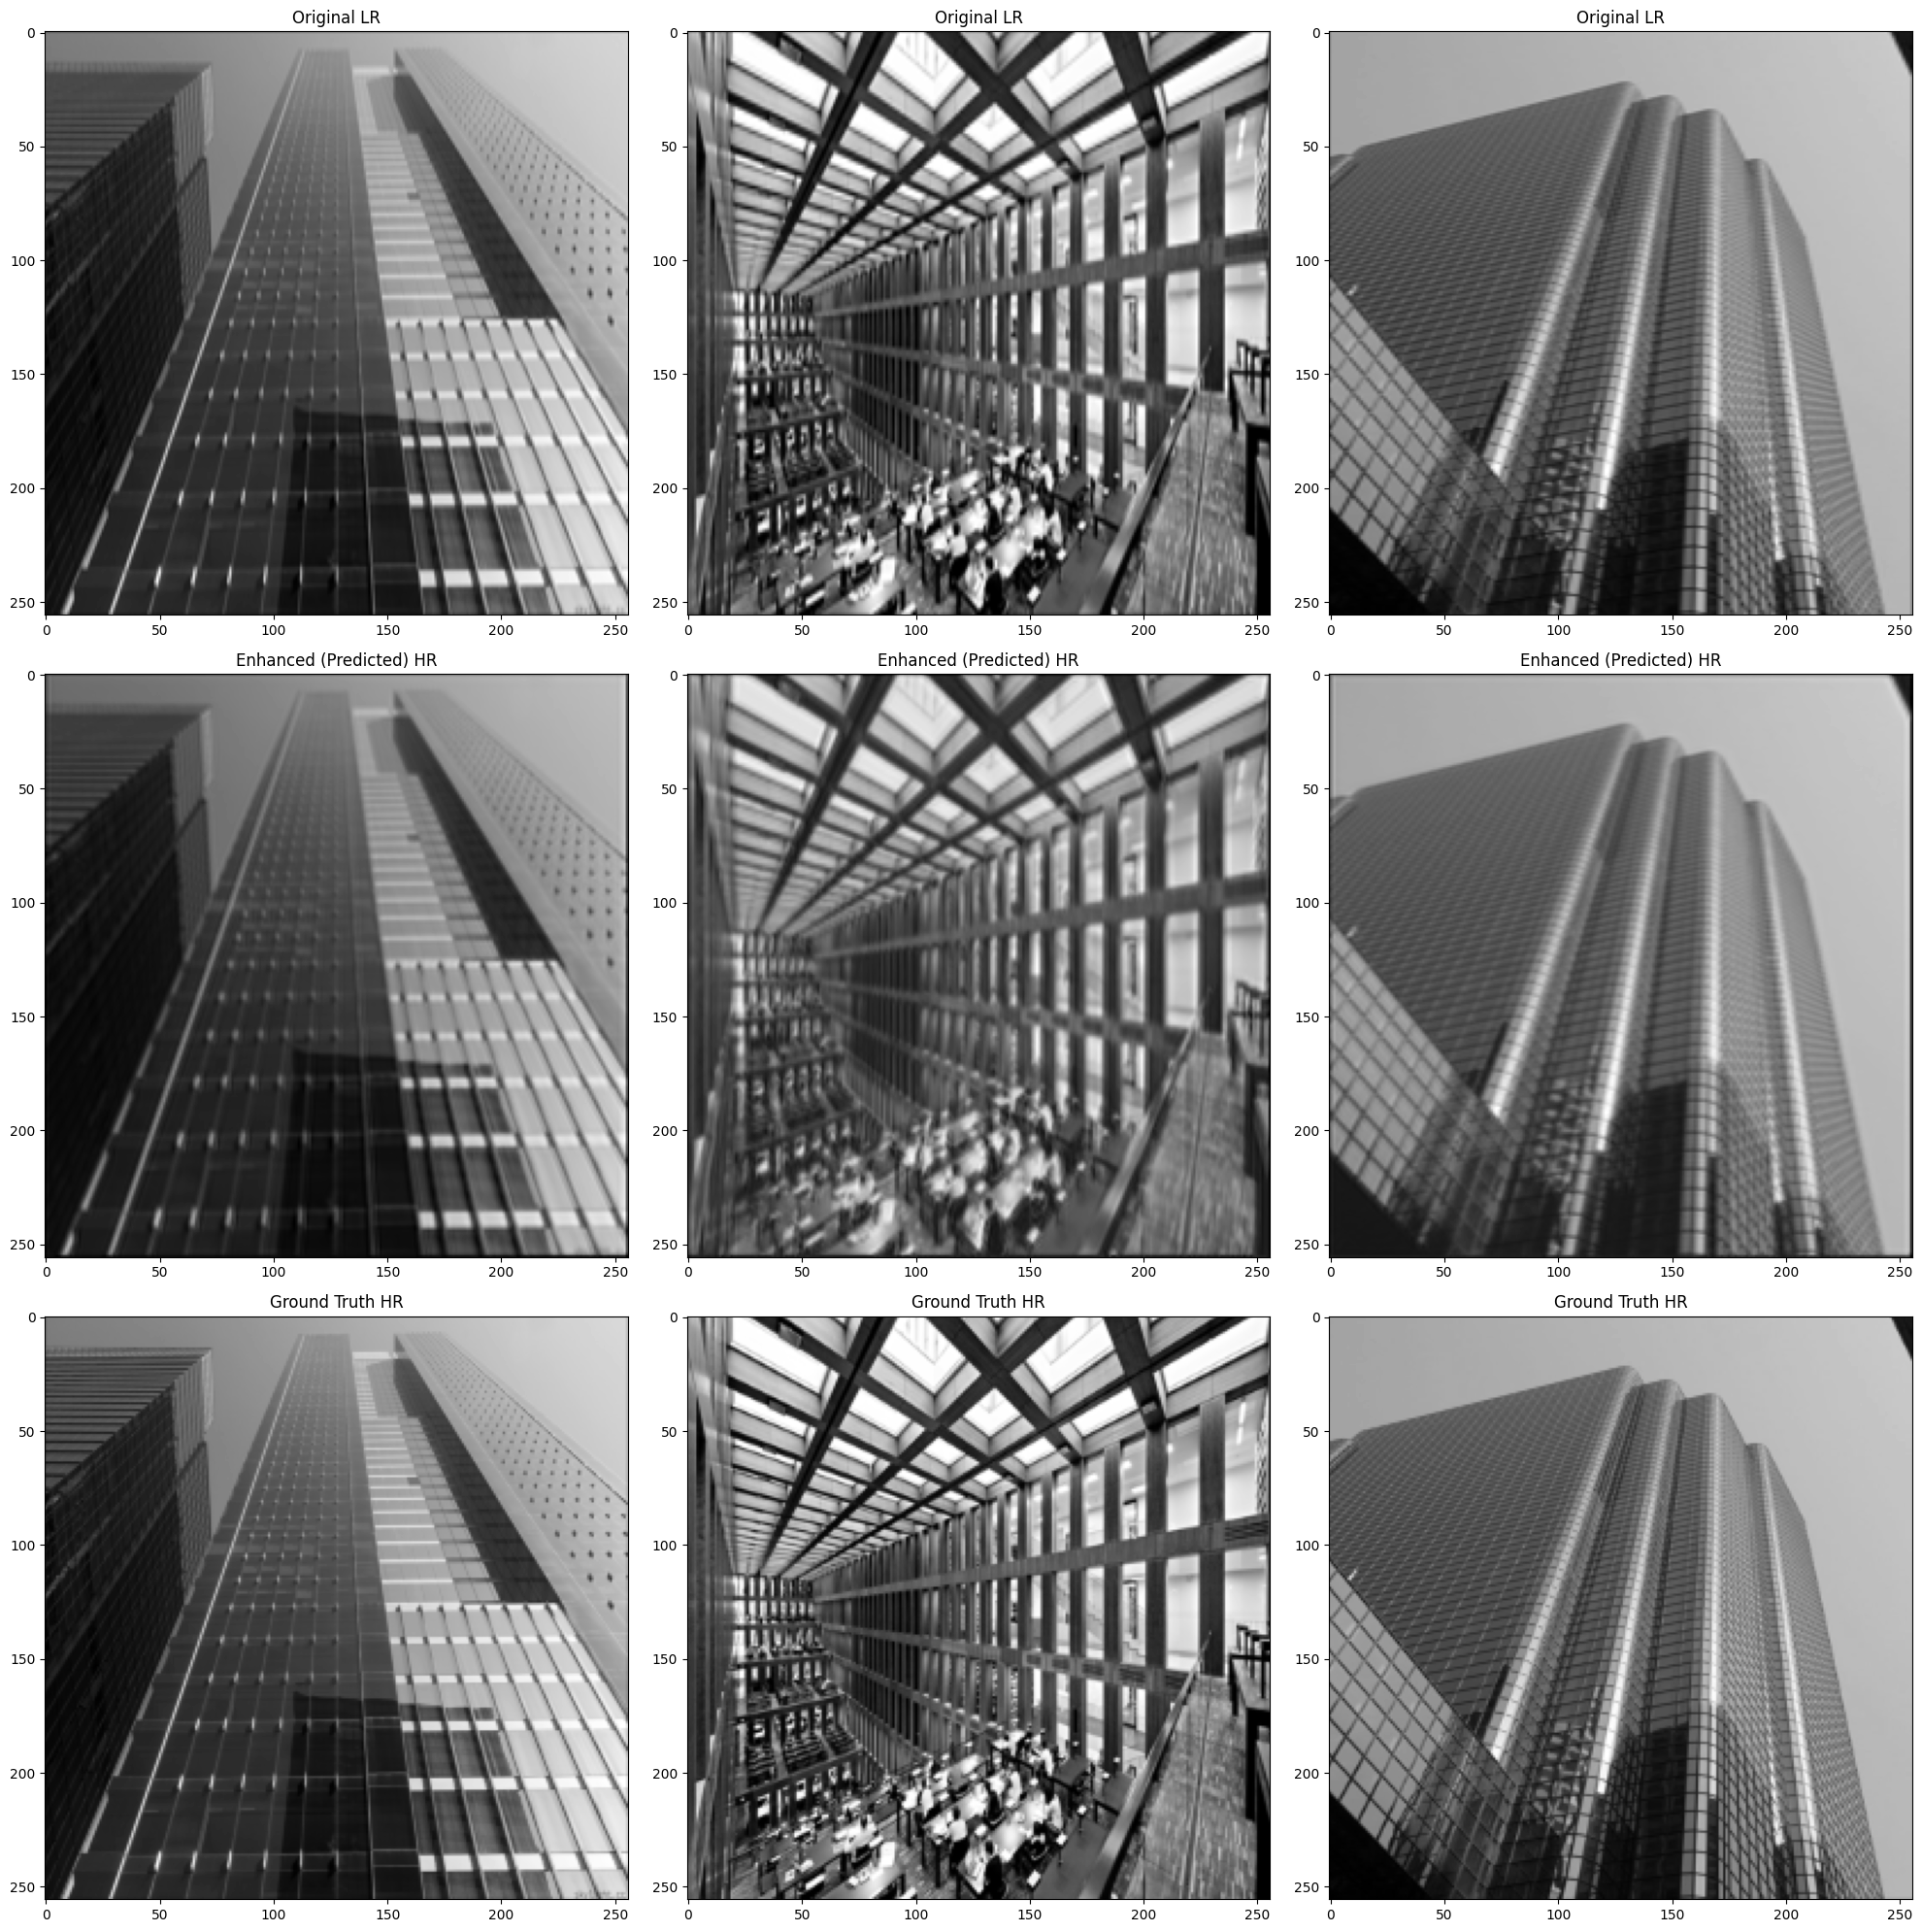

In [40]:
import matplotlib.pyplot as plt

model.eval()

# Visualize a few samples
num_samples_to_visualize = 3
plt.figure(figsize=(20, 20))

for i, (inputs_lr, targets_hr) in enumerate(test_loader):
    if i == num_samples_to_visualize:
        break

    # Select the first image from the batch
    input_lr = inputs_lr[0][0]  # Assuming the first image from the batch
    target_hr = targets_hr[0][0]  # Assuming the first image from the batch

    # Forward pass to get the enhanced image
    output_hr = model(input_lr.unsqueeze(0).unsqueeze(0))  # Add channel dimension

    # Convert PyTorch tensors to NumPy arrays for visualization
    input_lr_np = input_lr.numpy()
    output_hr_np = output_hr.detach().numpy()
    target_hr_np = target_hr.numpy()

    # Plot the original low-resolution image
    plt.subplot(3, num_samples_to_visualize, i + 1)
    plt.imshow(input_lr_np, cmap='gray')
    plt.title('Original LR')

    # Plot the enhanced image
    plt.subplot(3, num_samples_to_visualize, i + 1 + num_samples_to_visualize)
    plt.imshow(output_hr_np[0, 0], cmap='gray')  # Remove batch and channel dimensions
    plt.title('Enhanced (Predicted) HR')

    # Plot the ground truth high-resolution image
    plt.subplot(3, num_samples_to_visualize, i + 1 + 2 * num_samples_to_visualize)
    plt.imshow(target_hr_np, cmap='gray')
    plt.title('Ground Truth HR')

plt.tight_layout()
plt.show()


In [41]:
plt.savefig('image_grid_edsr.png')

<Figure size 640x480 with 0 Axes>

In [28]:
import torch
import math

def psnr(img1, img2):
    mse = torch.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 1.0
    psnr = 20 * math.log10(max_pixel / math.sqrt(mse.item()))
    return psnr


model.eval()

# Calculate PSNR for all test images
psnr_values = []

for i, (inputs_lr, targets_hr) in enumerate(test_loader):
    # Forward pass to get the enhanced image
    outputs_hr = model(inputs_lr)

    # Calculate PSNR for each image in the batch
    for j in range(outputs_hr.size(0)):
        psnr_value = psnr(outputs_hr[j].squeeze(), targets_hr[j])
        psnr_values.append(psnr_value)

        print(f'Sample {i * test_loader.batch_size + j + 1}, PSNR: {psnr_value:.2f}')

# Calculate average PSNR
average_psnr = sum(psnr_values) / len(psnr_values)
print(f'Average PSNR: {average_psnr:.2f}')


Sample 1, PSNR: 16.07
Sample 2, PSNR: 15.88
Sample 3, PSNR: 15.77
Sample 4, PSNR: 15.42
Sample 5, PSNR: 16.05
Sample 6, PSNR: 15.88
Sample 7, PSNR: 17.41
Sample 8, PSNR: 15.58
Sample 9, PSNR: 15.57
Sample 10, PSNR: 16.51
Sample 11, PSNR: 16.75
Sample 12, PSNR: 15.50
Sample 13, PSNR: 17.45
Sample 14, PSNR: 17.50
Sample 15, PSNR: 16.34
Sample 16, PSNR: 16.22
Sample 17, PSNR: 16.08
Sample 18, PSNR: 16.15
Sample 19, PSNR: 15.42
Sample 20, PSNR: 17.66
Sample 21, PSNR: 16.54
Sample 22, PSNR: 15.10
Sample 23, PSNR: 16.16
Sample 24, PSNR: 15.43
Sample 25, PSNR: 16.33
Sample 26, PSNR: 15.82
Sample 27, PSNR: 14.90
Sample 28, PSNR: 17.30
Sample 29, PSNR: 13.92
Sample 30, PSNR: 15.64
Sample 31, PSNR: 14.80
Sample 32, PSNR: 16.26
Sample 33, PSNR: 17.82
Sample 34, PSNR: 14.93
Sample 35, PSNR: 15.43
Sample 36, PSNR: 14.79
Sample 37, PSNR: 14.74
Sample 38, PSNR: 15.35
Sample 39, PSNR: 14.95
Sample 40, PSNR: 16.07
Average PSNR: 15.94


In [49]:
import numpy as np
from skimage.metrics import structural_similarity as compare_ssim
from torchvision.transforms.functional import to_pil_image, to_tensor

# Set the model to evaluation mode
model.eval()

# Calculate SSIM for all test images
ssim_values = []

for i, (inputs_lr, targets_hr) in enumerate(test_loader):
    # Forward pass to get the enhanced image
    outputs_hr = model(inputs_lr)

    # Calculate SSIM for each image in the batch
    for j in range(outputs_hr.size(0)):
        # Select the first channel for comparison
        output_hr_np = outputs_hr[j][0].squeeze().detach().numpy()
        target_hr_np = targets_hr[j].squeeze().numpy()

        # Normalize images to the range [0, 255] if needed
        output_hr_np = (output_hr_np * 255).astype(np.uint8)
        target_hr_np = (target_hr_np * 255).astype(np.uint8)

        # Print the shapes before resizing
        print(f"Output shape before resizing: {output_hr_np.shape}")
        print(f"Target shape before resizing: {target_hr_np.shape}")

        # Resize images to the same dimensions using PIL
        output_hr_pil = to_pil_image(outputs_hr[j][0].squeeze())
        output_hr_pil = output_hr_pil.resize((target_hr_np.shape[1], target_hr_np.shape[0]))

        # Convert back to numpy array
        output_hr_np = to_tensor(output_hr_pil).numpy()

        # Print the shapes after resizing
        print(f"Output shape after resizing: {output_hr_np.shape}")
        print(f"Target shape after resizing: {target_hr_np.shape}")

        # Calculate SSIM
        ssim_value, _ = compare_ssim(output_hr_np.squeeze(), target_hr_np, full=True)
        ssim_values.append(ssim_value)

        print(f'Sample {i * test_loader.batch_size + j + 1}, SSIM: {ssim_value:.4f}')

# Calculate average SSIM
average_ssim = sum(ssim_values) / len(ssim_values)
print(f'Average SSIM: {average_ssim:.4f}')


Output shape before resizing: (256, 256)
Target shape before resizing: (256, 256)
Output shape after resizing: (1, 256, 256)
Target shape after resizing: (256, 256)
Sample 1, SSIM: 0.0000
Output shape before resizing: (256, 256)
Target shape before resizing: (256, 256)
Output shape after resizing: (1, 256, 256)
Target shape after resizing: (256, 256)
Sample 2, SSIM: 0.0000
Output shape before resizing: (256, 256)
Target shape before resizing: (256, 256)
Output shape after resizing: (1, 256, 256)
Target shape after resizing: (256, 256)
Sample 3, SSIM: 0.0000
Output shape before resizing: (256, 256)
Target shape before resizing: (256, 256)
Output shape after resizing: (1, 256, 256)
Target shape after resizing: (256, 256)
Sample 4, SSIM: 0.0001
Output shape before resizing: (256, 256)
Target shape before resizing: (256, 256)
Output shape after resizing: (1, 256, 256)
Target shape after resizing: (256, 256)
Sample 5, SSIM: 0.0000
Output shape before resizing: (256, 256)
Target shape before

In [ ]:
pip install image-similarity-measures[speedup]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 44.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 72.3 MB/s eta 0:00:00
  Created wheel for phasepack: filename=phasepack-1.5-py3-none-any.whl size=26961 sha256=4082a8a16bfed2ac7ae6d7e2dd8bb0576547f22754cfb88c6355501e8e995f25
  Stored in directory: /root/.cache/pip/wheels/05/37/63/26a896aa2113f7eac15120c277787dcdad4a9b70cace22251f
Successfully built phasepack
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.19.3
    Uninstalling scikit-image-0.19.3:
      Successfully uninstalled scikit-image-0.19.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
li

In [38]:
import torch
import math

def rmse(img1, img2):
    mse = torch.mean((img1 - img2) ** 2)
    rmse_value = math.sqrt(mse.item())
    return rmse_value

model.eval()

# Calculate RMSE for all test images
rmse_values = []

for i, (inputs_lr, targets_hr) in enumerate(test_loader):
    # Forward pass to get the enhanced image
    outputs_hr = model(inputs_lr)

    # Calculate RMSE for each image in the batch
    for j in range(outputs_hr.size(0)):
        rmse_value = rmse(outputs_hr[j].squeeze(), targets_hr[j])
        rmse_values.append(rmse_value)

        print(f'Sample {i * test_loader.batch_size + j + 1}, RMSE: {rmse_value:.2f}')

# Calculate average RMSE
average_rmse = sum(rmse_values) / len(rmse_values)
print(f'Average RMSE: {average_rmse:.2f}')


Sample 1, RMSE: 0.13
Sample 2, RMSE: 0.13
Sample 3, RMSE: 0.14
Sample 4, RMSE: 0.14
Sample 5, RMSE: 0.14
Sample 6, RMSE: 0.15
Sample 7, RMSE: 0.12
Sample 8, RMSE: 0.14
Sample 9, RMSE: 0.19
Sample 10, RMSE: 0.17
Sample 11, RMSE: 0.17
Sample 12, RMSE: 0.20
Sample 13, RMSE: 0.16
Sample 14, RMSE: 0.16
Sample 15, RMSE: 0.18
Sample 16, RMSE: 0.18
Sample 17, RMSE: 0.16
Sample 18, RMSE: 0.16
Sample 19, RMSE: 0.17
Sample 20, RMSE: 0.13
Sample 21, RMSE: 0.15
Sample 22, RMSE: 0.18
Sample 23, RMSE: 0.16
Sample 24, RMSE: 0.17
Sample 25, RMSE: 0.14
Sample 26, RMSE: 0.15
Sample 27, RMSE: 0.17
Sample 28, RMSE: 0.13
Sample 29, RMSE: 0.19
Sample 30, RMSE: 0.15
Sample 31, RMSE: 0.16
Sample 32, RMSE: 0.14
Sample 33, RMSE: 0.14
Sample 34, RMSE: 0.19
Sample 35, RMSE: 0.18
Sample 36, RMSE: 0.19
Sample 37, RMSE: 0.19
Sample 38, RMSE: 0.18
Sample 39, RMSE: 0.19
Sample 40, RMSE: 0.17
Average RMSE: 0.16
